# Sentiment Analysis Project

### Objective:
Analyze a sentiment analysis dataset from Kaggle to classify text data as positive or negative
using TextBlob.

### IMDB Movie Reviews Dataset:
- This dataset includes movie reviews from IMDb, labeled as positive or
negative. It's commonly used for sentiment analysis tasks.
- IMDB Movie Reviews Dataset

### Solution:

#### Import Necessary Libraries

In [9]:
# load the libraries
import pandas as pd
import numpy as np
import nltk
import regex as re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#### Import the Training Dataset

In [11]:
# Load the IMDB Dataset
df = pd.read_csv(r"C:\Users\TECH_SAMARAS\Desktop\IMDB Dataset.csv")

In [12]:
# Display the shape and the first 10 rows of the dataset
print("Dataframe shape:", df.shape)
df.head(10)

Dataframe shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [13]:
# Display dataset info including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [14]:
# Sentiment count
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

#### Preprocessing Data

In [16]:
# Downloading NLTK packages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Preprocessing setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TECH_SAMARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TECH_SAMARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TECH_SAMARAS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Function to clean and preprocess reviews column
def preprocessor(review):
    review = re.sub(r"http\S+|www\S+|https\S+", "", review)  
    review = re.sub(r"@\w+|\#", "", review)
    review = re.sub(r"\'ll", "will", review)
    review = re.sub(r"\'ve", "have", review)
    review = re.sub(r"\'re", "are", review)
    review = re.sub(r"\'d", "would", review)
    review = re.sub(r"won't", "will not", review)
    review = re.sub(r"don't", "do not", review)
    review = re.sub(r"didn't", "did not", review)
    review = re.sub(r"can't", "can not", review)
    review = re.sub(r"couldn't", "could not", review)
    review = re.sub(r"it's", "it is", review)
    review = re.sub(r"haven't", "have not", review)
    review = re.sub(r"[^\w\s]", "", review.lower())
    tokens = word_tokenize(review)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [18]:
# New cleaned review column
df['cleaned_review'] = df['review'].apply(preprocessor)

#### Converting Sentiment Labels to Binary Format

In [20]:
# Map sentiment to binary values
imdb_sent_map = {'positive': 1, 'negative': 0}
df['sentiment'] = df['sentiment'].map(imdb_sent_map)
print(df[['cleaned_review' , 'sentiment']].head())

                                      cleaned_review  sentiment
0  one reviewer mentioned watching 1 oz episode y...          1
1  wonderful little production br br filming tech...          1
2  thought wonderful way spend time hot summer we...          1
3  basically there family little boy jake think t...          0
4  petter matteis love time money visually stunni...          1


#### Implement of WordClouds

In [22]:
# Word clouds for positive and negative sentiments
positive_reviews = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 0]['cleaned_review'])

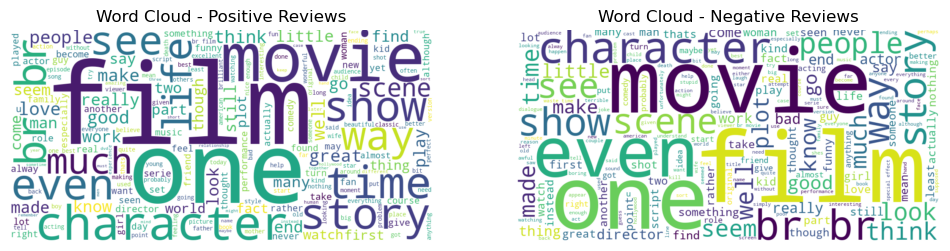

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=1000, height=500, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=1000, height=500, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()

#### Splitting Dataset (80/20)

In [25]:
# Using Train-Test Split Method (80% training set & 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

#### Sentiment Prediction with TextBlob - 0.1 threshold

In [27]:
# TextBlob Sentiment Analysis function
def get_TextBlob_sentiment(cleaned_review):
    analysis = TextBlob(cleaned_review)
    if analysis.sentiment.polarity > 0.1:
        return 1 # Positive sentiment
    else:
        return 0 # Negative sentiment

# Apply sentiment analysis to the test data
y_pred_TextBlob = X_test.apply(get_TextBlob_sentiment)

#### Evaluating Model Performance - TextBlob

In [29]:
# Evaluation TextBlob metrics
TextBlob_accuracy = accuracy_score(y_test, y_pred_TextBlob)
TextBlob_precision = precision_score(y_test, y_pred_TextBlob)
TextBlob_recall = recall_score(y_test, y_pred_TextBlob)
TextBlob_f1 = f1_score(y_test, y_pred_TextBlob)
TextBlob_conf_matrix = confusion_matrix(y_test, y_pred_TextBlob)

print('TextBlob Evaluation Metrics:\n')
print(f'Accuracy: {TextBlob_accuracy:.2f}')
print(f'Precision: {TextBlob_precision:.2f}')
print(f'Recall: {TextBlob_recall:.2f}')
print(f'F1-Score: {TextBlob_f1:.2f}')

TextBlob Evaluation Metrics:

Accuracy: 0.76
Precision: 0.77
Recall: 0.76
F1-Score: 0.76


In [30]:
print('TextBlob Classification Report:\n')
print(classification_report(y_test, y_pred_TextBlob, target_names=['Negative', 'Positive']))

TextBlob Classification Report:

              precision    recall  f1-score   support

    Negative       0.75      0.76      0.76      4961
    Positive       0.77      0.76      0.76      5039

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



#### Visualizing TextBlob Performance with Confusion Matrix

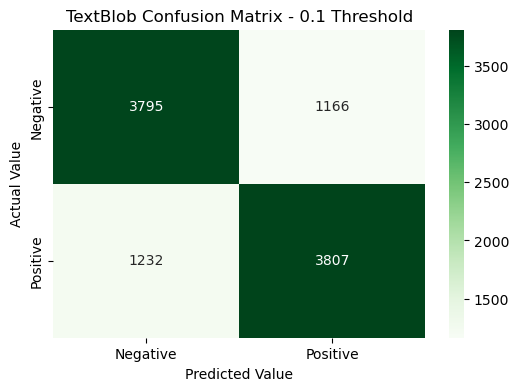

In [32]:
# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(TextBlob_conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('TextBlob Confusion Matrix - 0.1 Threshold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

#### Sentiment Prediction with VADER - 0.5 threshold

In [34]:
analyzer = SentimentIntensityAnalyzer()

def get_VADER_sentiment(cleaned_review):
    score = analyzer.polarity_scores(cleaned_review)['compound']
    if score > 0.5:
        return 1  # Positive sentiment
    else: 
        return 0 # Negative sentiment

y_pred_VADER = X_test.apply(get_VADER_sentiment)

#### Evaluation Perfomance - VADER

In [36]:
# Evaluation VADER metrics
VADER_accuracy = accuracy_score(y_test, y_pred_VADER)
VADER_precision = precision_score(y_test, y_pred_VADER)
VADER_recall = recall_score(y_test, y_pred_VADER)
VADER_f1 = f1_score(y_test, y_pred_VADER)
VADER_conf_matrix = confusion_matrix(y_test, y_pred_VADER)

print('VADER Evaluation Metrics:\n')
print(f'Accuracy: {VADER_accuracy:.2f}')
print(f'Precision: {VADER_precision:.2f}')
print(f'Recall: {VADER_recall:.2f}')
print(f'F1-Score: {VADER_f1:.2f}')

VADER Evaluation Metrics:

Accuracy: 0.70
Precision: 0.66
Recall: 0.83
F1-Score: 0.73


In [37]:
print('TextBlob Classification Report:\n')
print(classification_report(y_test, y_pred_VADER, target_names=['Negative', 'Positive']))

TextBlob Classification Report:

              precision    recall  f1-score   support

    Negative       0.76      0.56      0.65      4961
    Positive       0.66      0.83      0.73      5039

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



#### Visualizing VADER Performance with Confusion Matrix

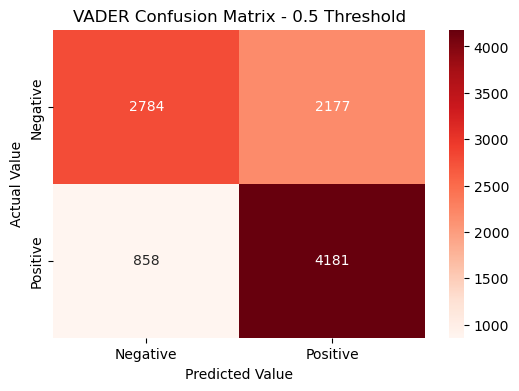

In [39]:
# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(VADER_conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('VADER Confusion Matrix - 0.5 Threshold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

## Assignment Report

1. I used a dataset with 50.000 movie reviews from IMDB (downloaded from Kaggle website), where each review is labeled as positive or negative. Also i checked for the balance of positive & negative reviews (balanced with 25.000 of each).

2. I cleaned the "review" column by removing stopwords, panctuation and website links. I also simplified the word (using the WordNetLemmatizer) and made everything lowercase. The cleaned reviews wre stored in a cleaned_review column for analysis.

3. I created Word Clouds to see the most common words in positive and negative reviews after cleaning it. High frequency positive reviews includes words like "good" and "great". The negative reviews instead, had words like "bad" and "terrible".

4. Then i proceed of splitting the data into 80% training and 20% testing using train_test_split method.

5. In the last part i was to checking the sentiment analysis using TextBlob and compare it with another sentiment analysis, the VADER (generate confusion matrices for both tools).

##### TextBlob results - using > 0.1 threshold

- The model it was right 76% (accuracy: 0.76).
- It was better at finding both positives and negatives (recall: 0.76 for both of them).
- The F1 score was 0.76 both positives and negatives reviews.


##### VADER results - using > 0.5 threshold

- The model it was right 70% (accuracy: 0.70).
- It was better at finding positives (recall: 0.83), but not as good at negatives (recall: 0.56).
- The F1 score was 0.73 for positives and 0.65 for negatives.

I used two tools (TextBlob & VADER) to check the sentiment of the reviews and see how well they work on this IMDB dataset for sentiment analysis. I started by trying a rule where any score above 0 is positive and 0 or below is negative, but i found this rule gave lower accuracy for both (0.70 for TextBlob & 0.68 for VADER) and had trouble finding negative reviews. 

This happened because many of these reviews were actually negative or neutral.

Then i decided to adjust the threshold to reduce false negatives for positive reviews and correct the misclassifications number using experimentally stricter thresholds (> 0.1 for TextBlob & > 0.5 for VADER).

TextBlob's accuracy improves significantly from 0.70 to 0.76, catching the misclassification for negative or neutral reviews.

VADER's accuracy improves only from 0.68 to 0.70, catching more positives, but the score is less sensitive to small changes and more complicated for handle sentiment in general than TextBlob.

#### Below the experimental using 0 as threshold 

TextBlob Evaluation Metrics:

Accuracy: 0.70
Precision: 0.64
Recall: 0.93
F1-Score: 0.76
TextBlob Classification Report:

              precision    recall  f1-score   support

    Negative       0.87      0.46      0.60      4961
    Positive       0.64      0.93      0.76      5039

    accuracy                           0.70     10000
   macro avg       0.75      0.70      0.68     10000
weighted avg       0.75      0.70      0.68     10000



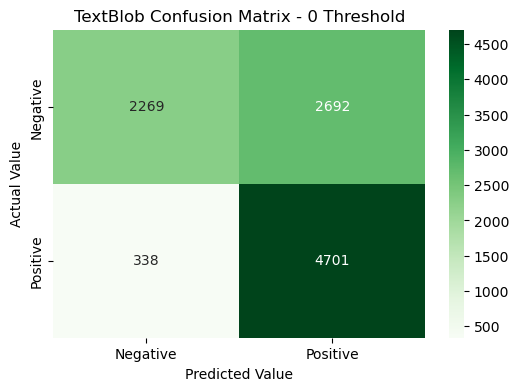

In [53]:
# TextBlob Sentiment Analysis function
def get_TextBlob_sentiment(cleaned_review):
    analysis = TextBlob(cleaned_review)
    if analysis.sentiment.polarity > 0:
        return 1 # Positive sentiment
    else:
        return 0 # Negative sentiment

# Apply sentiment analysis to the test data
y_pred_TextBlob = X_test.apply(get_TextBlob_sentiment)

# Evaluation TextBlob metrics
TextBlob_accuracy = accuracy_score(y_test, y_pred_TextBlob)
TextBlob_precision = precision_score(y_test, y_pred_TextBlob)
TextBlob_recall = recall_score(y_test, y_pred_TextBlob)
TextBlob_f1 = f1_score(y_test, y_pred_TextBlob)
TextBlob_conf_matrix = confusion_matrix(y_test, y_pred_TextBlob)

print('TextBlob Evaluation Metrics:\n')
print(f'Accuracy: {TextBlob_accuracy:.2f}')
print(f'Precision: {TextBlob_precision:.2f}')
print(f'Recall: {TextBlob_recall:.2f}')
print(f'F1-Score: {TextBlob_f1:.2f}')

print('TextBlob Classification Report:\n')
print(classification_report(y_test, y_pred_TextBlob, target_names=['Negative', 'Positive']))

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(TextBlob_conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('TextBlob Confusion Matrix - 0 Threshold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

VADER Evaluation Metrics:

Accuracy: 0.68
Precision: 0.63
Recall: 0.88
F1-Score: 0.73
TextBlob Classification Report:

              precision    recall  f1-score   support

    Negative       0.79      0.48      0.60      4961
    Positive       0.63      0.88      0.73      5039

    accuracy                           0.68     10000
   macro avg       0.71      0.68      0.66     10000
weighted avg       0.71      0.68      0.67     10000



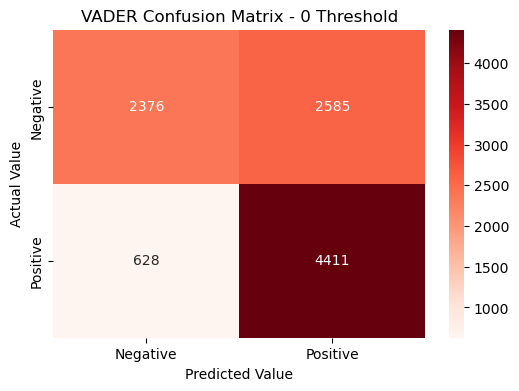

In [54]:
def get_VADER_sentiment(cleaned_review):
    score = analyzer.polarity_scores(cleaned_review)['compound']
    if score > 0:
        return 1  # Positive sentiment
    else: 
        return 0 # Negative sentiment

y_pred_VADER = X_test.apply(get_VADER_sentiment)

# Evaluation VADER metrics
VADER_accuracy = accuracy_score(y_test, y_pred_VADER)
VADER_precision = precision_score(y_test, y_pred_VADER)
VADER_recall = recall_score(y_test, y_pred_VADER)
VADER_f1 = f1_score(y_test, y_pred_VADER)
VADER_conf_matrix = confusion_matrix(y_test, y_pred_VADER)

print('VADER Evaluation Metrics:\n')
print(f'Accuracy: {VADER_accuracy:.2f}')
print(f'Precision: {VADER_precision:.2f}')
print(f'Recall: {VADER_recall:.2f}')
print(f'F1-Score: {VADER_f1:.2f}')

print('TextBlob Classification Report:\n')
print(classification_report(y_test, y_pred_VADER, target_names=['Negative', 'Positive']))

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(VADER_conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('VADER Confusion Matrix - 0 Threshold')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()